# Assignment 3: Working with Data

## Reading Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
file = 'survey.dta'

In [3]:
df = pd.read_stata(file,convert_categoricals=False)

## Question 1 and 2

In [4]:
qs = ['csa29','csa30','csa31']
answers = [1,3,2]
for i,q in enumerate(qs):
    df[q+'_correct'] = np.where(df[q]==answers[i],1,0)
    df[q+'_dnk'] = np.where(df[q]==98,1,0)


In [5]:
qs_c = [q+'_correct' for q in qs]


In [6]:
tab = df[qs_c].groupby(df['age']).mean().transpose().round(3)
labels = ['interest','ppp','diversification']
tab.index = labels
tab.columns = ['18-24','25-34','35-44','45-54','55-64','65+']
tab

,18-24,25-34,35-44,45-54,55-64,65+
interest,0.701,0.775,0.799,0.808,0.836,0.841
ppp,0.376,0.533,0.631,0.699,0.794,0.818
diversification,0.417,0.567,0.624,0.637,0.686,0.662


The fraction of correct answers generally incureases with age, consistent with accumulation of knowledge. There is no evidence that it goes down with age (inverse U). 

## Question 3 and 4

In [7]:
tab = df[qs_c].groupby(df['gender']).mean().transpose().round(3)
labels = ['interest','ppp','diversification']
tab.index = labels
tab.columns = ['male','female']
tab

,male,female
interest,0.854,0.756
ppp,0.764,0.605
diversification,0.705,0.539


In [8]:
qs_d = [q+'_dnk' for q in qs]
tab = df[qs_d].groupby(df['gender']).mean().transpose().round(3)
labels = ['interest','ppp','diversification']
tab.index = labels
tab.columns = ['male','female']
tab

,male,female
interest,0.055,0.101
ppp,0.090,0.205
diversification,0.203,0.380


We observe that males have a higher fraction of correct answers. But females do not necessarily get the question wrong. Rather they have a higher tendency to report do not know. 

## Question 5 and 6

In [9]:
cond = (df['csa29_correct']==1) & (df['csa30_correct']==1) & (df['csa31_correct']==1)
df['big3_correct'] = np.where(cond,1,0)

In [10]:
tab = df['big3_correct'].groupby(df['prov']).mean()
tab.index = ['NL','PEI','NS','NB','QC','ON','MB','SK','AB','BC']
tab.columns = ['All 3 correct']
tab

NL     0.484140
PEI    0.420900
NS     0.500000
NB     0.426987
QC     0.404858
ON     0.454545
MB     0.485158
SK     0.350711
AB     0.459336
BC     0.511848
Name: big3_correct, dtype: float64

We see that the fraction with all three correct is highest in BC and NS and lowest in SK and QC. There is considerable variation across provinces. Generally, scores are low. 

## Question 7

In [11]:
df['plan'] = np.where(df['csa17']==1,1,0)

In [12]:
vars = ['gender','age','prov']
for v in vars:
    tab = df['plan'].groupby(df[v]).mean().transpose().round(3)
    print('differences by '+v)
    print(tab)

differences by gender
gender
1    0.360
2    0.288
Name: plan, dtype: float64
differences by age
age
1    0.183
2    0.240
3    0.295
4    0.312
5    0.380
6    0.406
Name: plan, dtype: float64
differences by prov
prov
1.0     0.317
2.0     0.231
3.0     0.282
4.0     0.235
5.0     0.178
6.0     0.335
7.0     0.332
8.0     0.232
9.0     0.428
10.0    0.265
Name: plan, dtype: float64


Yes, there are differences. Males are more likely to have a formal plan. In terms of age, older respondents are more likely to have a plan and differences across provinces are important. For example, less than 17.8% in Quebec have a plan while that fraction is 33.5% in Ontario and 42.8% in Alberta. 

## Question 8

In [13]:
tab = df['plan'].groupby(df['big3_correct']).mean()
tab.index = ['incorrect','all 3 correct']
tab

incorrect        0.273272
all 3 correct    0.386458
Name: plan, dtype: float64

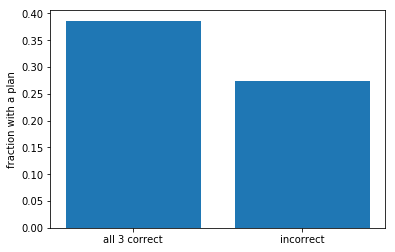

In [14]:
plt.figure()
plt.bar(tab.index,tab.values)
plt.ylabel('fraction with a plan')
plt.show()


We see that those who answer correctly tend to have a plan. However, this is a correlation. It is possible that the causality runs the other way. Those who have a plan tend to want to learn more about financial matters. It may also be because they have an advisor or because they have assets that require management (and hence a plan). 

## Question 9

To weight, one needs to apply the numpy average function (which allows for weights) to the dataframe

In [15]:
vars = ['gender','age','prov']
for v in vars:
    weighted = df.groupby(v).apply(lambda x: np.average(x.big3_correct, weights=x.wc)).transpose().round(3)
    unweighted = df.groupby(v).apply(lambda x: np.average(x.big3_correct)).transpose().round(3)
    print('differences by '+v)
    tab = pd.concat([weighted,unweighted],axis=1)
    tab.columns = ['weighted','unweighted']
    print(tab)
    


differences by gender
        weighted  unweighted
gender                      
1          0.514       0.563
2          0.328       0.348
differences by age
     weighted  unweighted
age                      
1       0.196       0.205
2       0.358       0.357
3       0.425       0.421
4       0.467       0.469
5       0.463       0.536
6       0.457       0.557
differences by prov
      weighted  unweighted
prov                      
1.0      0.449       0.484
2.0      0.417       0.421
3.0      0.422       0.500
4.0      0.369       0.427
5.0      0.375       0.405
6.0      0.388       0.455
7.0      0.447       0.485
8.0      0.333       0.351
9.0      0.394       0.459
10.0     0.488       0.512


We see that weighting has some impact for males and at older ages. It also has some impact by provinces. 